In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 200)         # adjust based on terminal width
pd.set_option('display.float_format', '{:.3f}'.format)  # float precision

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive')

# Load the dataset (Excel file)
file_path = '/content/gdrive/My Drive/Specialedatav2.csv'
df = pd.read_csv(file_path)

Mounted at /content/gdrive


In [ ]:
df = df.dropna(subset=['scores'])
df = df[df['scores'] > 95]
df = df[df.result_id != 2]
df.loc[df['bodypart_name'].str.contains('foot', case=False, na=False), 'bodypart_name'] = 'foot'
df = df[df.bodypart_name == "foot"]

In [ ]:
type_counts = df['result_id'].value_counts()
print("Breakdown by type_name:\n", type_counts)

Breakdown by type_name:
 result_id
1    133571
0     30869
2       565
Name: count, dtype: int64


In [ ]:
type_counts = df['bodypart_name'].value_counts()
print("Breakdown by type_name:\n", type_counts)

Breakdown by type_name:
 bodypart_name
foot          150419
head           10977
foot_right      2697
foot_left        461
other            451
Name: count, dtype: int64


In [ ]:
head = df[(df["bodypart_name"] == 'head') | (df["bodypart_name"] == 'other')]

pass_success_rate_head = (df['result_name'] == 'success').mean() * 100
print (pass_success_rate_head)

80.94966819187297


In [ ]:


pass_length_head = (head['pass_length']).mean()
print (pass_length_head)
pass_angle_head = (head['pass_angle']).mean()
print (pass_angle_head)


12.625647554658004
3.0221749056106773


In [ ]:
nonhead = df[~df["bodypart_name"].isin(['head', 'other'])]
pass_length_head = (df['pass_length']).mean()
print (pass_length_head)

17.956756871807347


In [ ]:
len(df)

146911

In [ ]:
df.groupby("type_name").size()


,0
type_name,
cross,2860
pass,144051


In [ ]:
cross = df[df["type_name"] == 'cross']
cross.groupby("starting_position").size()


,0
starting_position,
Defender,884
Midfielder,1107
Striker,474
Substitute,395


In [ ]:
df = df.dropna(subset=['scores'])
df = df[df['scores'] > 95]
df = df[df.result_id != 2]
df.loc[df['bodypart_name'].str.contains('foot', case=False, na=False), 'bodypart_name'] = 'foot'
df = df[df.bodypart_name == "foot"]

In [ ]:
len(df)

146911

In [ ]:
df.shape

(157883, 1477)

In [ ]:
num_unique_games = df['game_id'].nunique()
print(num_unique_games)


192


In [ ]:
type_counts = df['result_name'].value_counts()
print("Breakdown by type_name:\n", type_counts)

Breakdown by type_name:
 result_name
success    122919
fail        23992
Name: count, dtype: int64


In [ ]:
pass_success_rate = (df['result_name'] == 'success').mean() * 100
print(f"\nPass success rate: {pass_success_rate:.2f}%")


Pass success rate: 83.67%


In [ ]:
# Create a 'success' column: 1 if success, 0 otherwise
df['is_success'] = (df['result_name'] == 'success').astype(int)


# Group by team to get total passes and successful passes
pass_summary = df.groupby('team_name').agg(
    total_passes=('is_success', 'count'),
    successful_passes=('is_success', 'sum'),
    games_played=('game_id', 'nunique')  # count unique games
).reset_index()

# Calculate per-game averages
pass_summary['passes_per_game'] = pass_summary['total_passes'] / pass_summary['games_played']
pass_summary['pass_success_rate'] = (pass_summary['successful_passes'] / pass_summary['total_passes']) * 100

# Sort by passes per game or success rate
pass_summary = pass_summary.sort_values(by='passes_per_game', ascending=False)

print(pass_summary)
pass_summary.to_csv("/content/gdrive/MyDrive/fixedtestdatav12.csv")

          team_name  total_passes  successful_passes  games_played  passes_per_game  pass_success_rate
4   FC Nordsjælland         16425              14521            32          513.281             88.408
9      Silkeborg IF         16007              14017            32          500.219             87.568
2      FC København         14815              12853            33          448.939             86.757
1        Brøndby IF         14357              12338            32          448.656             85.937
7   Odense Boldklub         11408               9307            31          368.000             81.583
11        Viborg FF         11471               9554            32          358.469             83.288
5       Hvidovre IF         11365               9136            32          355.156             80.387
8        Randers FC         11256               9227            32          351.750             81.974
0        AGF Aarhus         11248               9330            32       

OSError: Cannot save file into a non-existent directory: ''/content/gdrive/MyDrive'

In [ ]:
(df["result_name"] == "success").sum()

np.int64(122919)

In [ ]:
(df["result_name"] == "fail").sum()

np.int64(23992)

In [ ]:
(df["scores"] < 95).sum()

np.int64(0)

In [ ]:
df["scores"].mean()

np.float64(98.16898789577729)

In [ ]:
print(df.columns[:45].tolist())


['Unnamed: 0', 'original_event_id', 'team_id_x', 'period_id_x', 'matched_frames', 'scores', 'game_id', 'period_id_y', 'time_seconds', 'team_id_y', 'player_id', 'start_x', 'end_x', 'start_y', 'end_y', 'type_id', 'result_id', 'bodypart_id', 'pass_angle', 'pass_length', 'action_id', 'type_name', 'result_name', 'bodypart_name', 'team_name', 'player_name', 'is_starter', 'minutes_played', 'jersey_number', 'starting_position', 'event_id', 'timestamp_x', 'period_id', 'timestamp_y', 'frame_id', 'ball_state', 'ball_owning_team_id', 'ball_x', 'ball_y', 'ball_z', 'ball_speed', '244449_x', '244449_y', '244449_teamid', '244449_s']


In [ ]:
df["pass_length"].max()


100.0

In [ ]:
df["pass_angle"].mean()

np.float64(3.073921698233126)

In [ ]:
print("Mean of start_x:", df["start_x"].mean())
print("Mean of end_x:", df["end_x"].mean())
print("Mean of start_y:", df["start_y"].mean())
print("Mean of end_y:", df["end_y"].mean())


Mean of start_x: 46.97553188120317
Mean of end_x: 52.100303389218595
Mean of start_y: 50.03167345439344
Mean of end_y: 50.450876281803616


In [ ]:
!pip install mplsoccer
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.5 MB/s eta 0:00:00


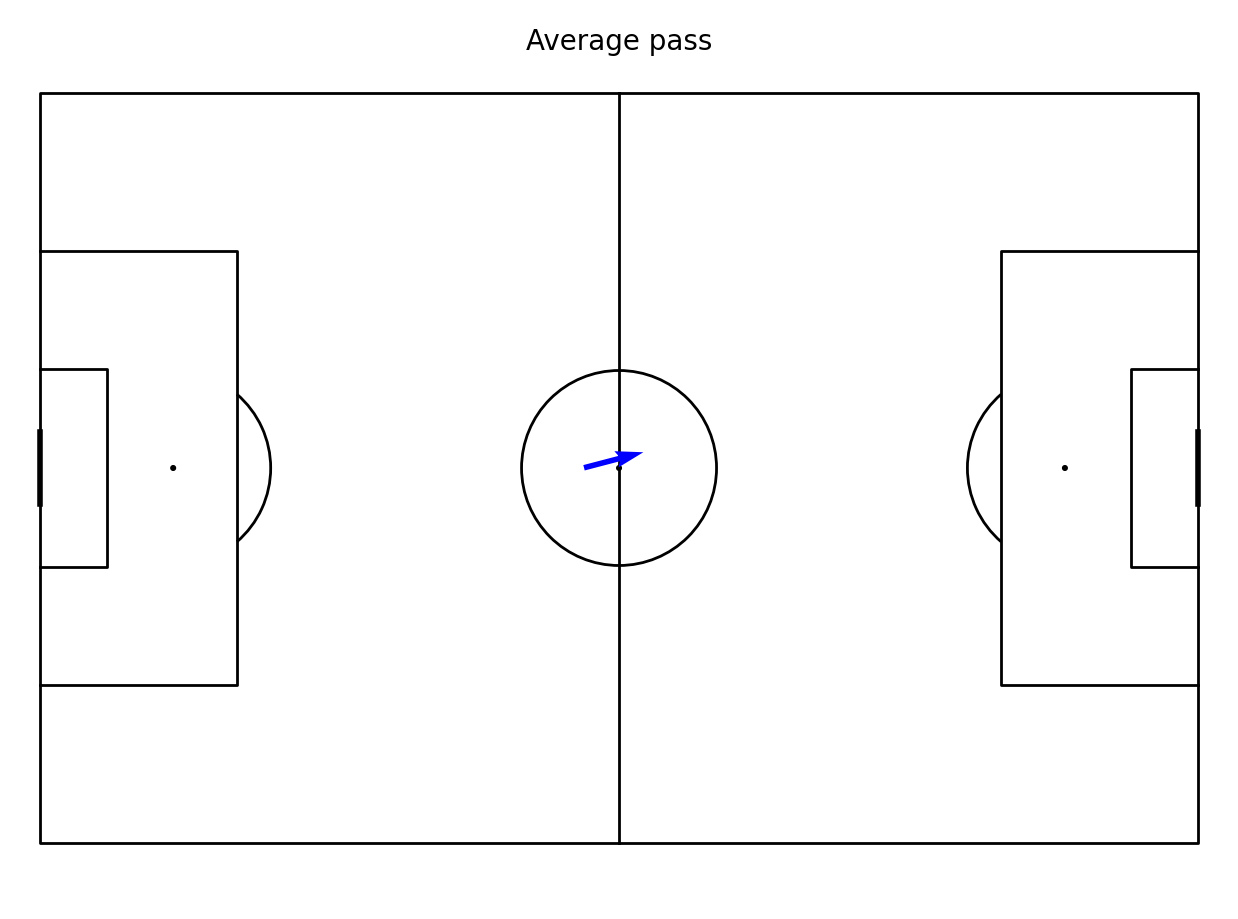

In [ ]:
pitch = Pitch(pitch_type = 'opta', line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df["start_x"].mean(), df["start_y"].mean(),
            df["end_x"].mean(), df["end_x"].mean(), color = "blue", ax=ax['pitch'])
fig.suptitle("Average pass", fontsize = 20)
plt.show()

In [ ]:
df = df[df["original_event_id"].isin([
    2623403781, 2665528293, 2693448383, 2581569795, 2598108097,
    2598121903, 2613838263, 2669195549, 2674726387, 2691646901
])]


In [ ]:
mask_bronze = (df.type_name == 'pass') & (df.player_name == "Oliver Olsen")

In [ ]:
len(df[df["player_name"]== 'Oliver Olsen'])

994

In [ ]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.3 MB/s eta 0:00:00


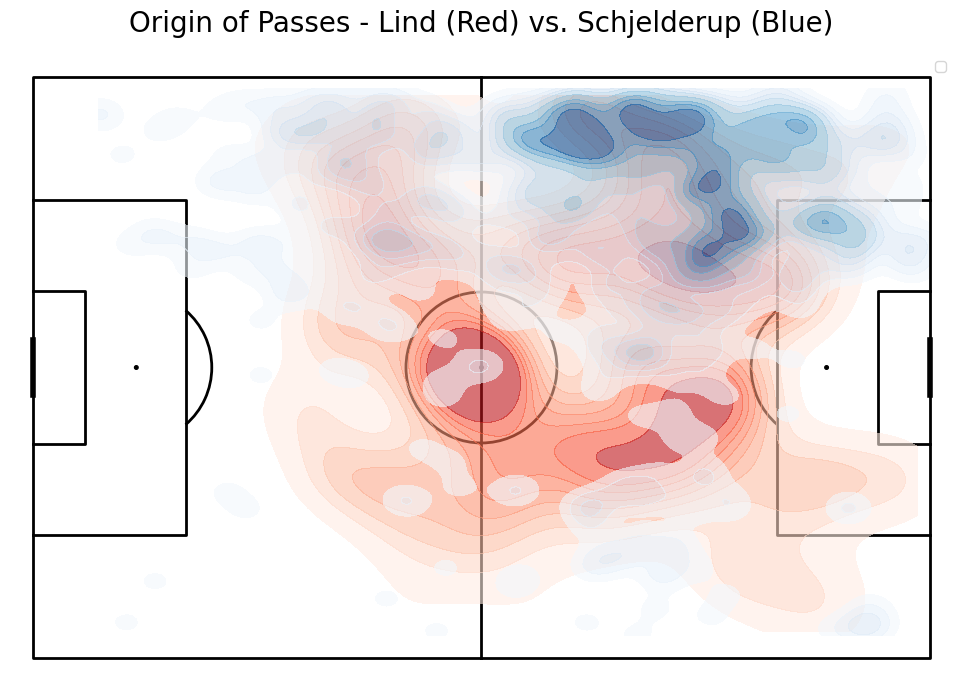

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Filter passes for each player
mask_lind = (df.player_name == "Alexander Lind") & (df.type_name == 'pass')
df_lind_pass = df.loc[mask_lind, ['start_x', 'start_y']]

mask_schjelderup = (df.player_name == "Andreas Schjelderup") & (df.type_name == 'pass')
df_schj_pass = df.loc[mask_schjelderup, ['start_x', 'start_y']]

# Set up the pitch
pitch = Pitch(
    pitch_type='opta',
    pitch_color='white',
    line_color='black',
    stripe=False
)
fig, ax = pitch.draw(figsize=(10, 7))

# KDE for Alexander Lind (red)
pitch.kdeplot(
    x=df_lind_pass.start_x,
    y=df_lind_pass.start_y,
    ax=ax,
    cmap='Reds',
    fill=True,
    alpha=0.6,
    bw_adjust=0.6,
    thresh=0.05,
    cut=0,
    label='Alexander Lind'
)

# KDE for Andreas Schjelderup (blue)
pitch.kdeplot(
    x=df_schj_pass.start_x,
    y=df_schj_pass.start_y,
    ax=ax,
    cmap='Blues',
    fill=True,
    alpha=0.6,
    bw_adjust=0.3,
    thresh=0.05,
    cut=0,
    label='Andreas Schjelderup'
)

# Title and legend
fig.suptitle("Origin of Passes - Lind (Red) vs. Schjelderup (Blue)", fontsize=20)
ax.legend(loc='upper right')

plt.show()


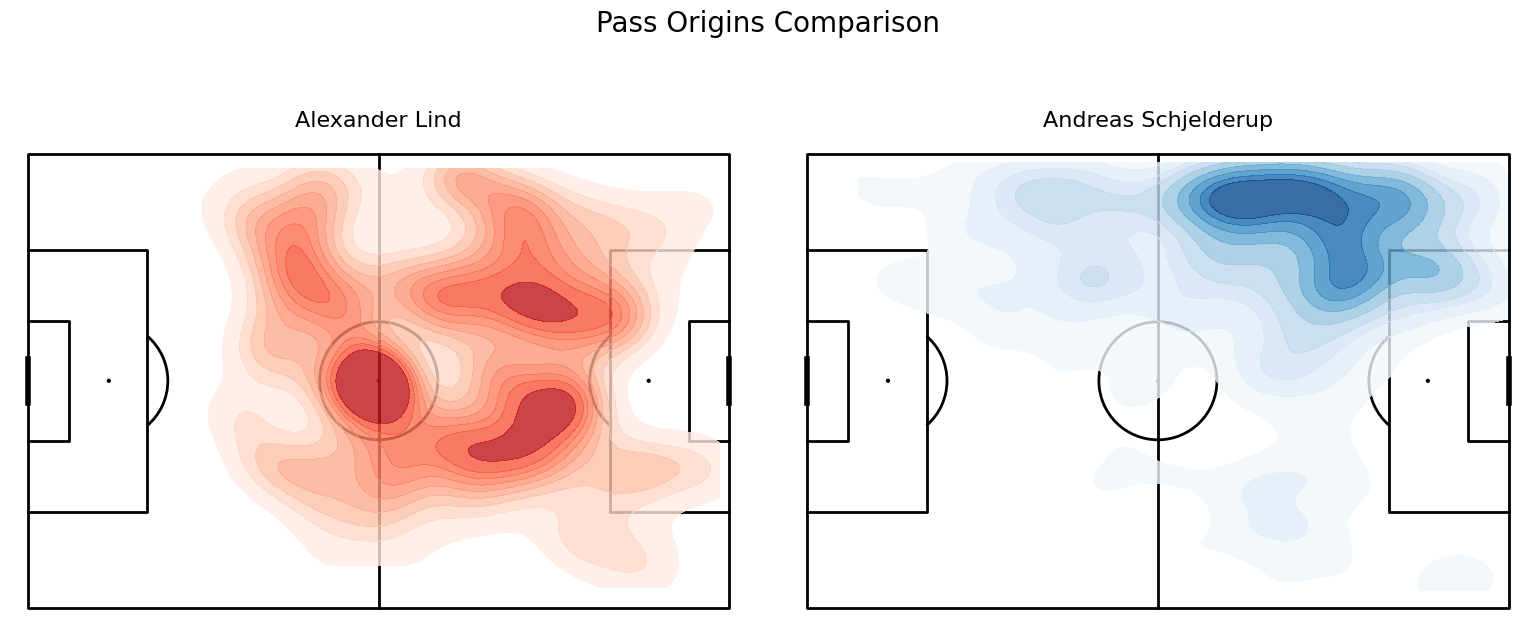

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Filter passes for each player
mask_lind = (df.player_name == "Alexander Lind") & (df.type_name == 'pass')
df_lind_pass = df.loc[mask_lind, ['start_x', 'start_y']]

mask_schjelderup = (df.player_name == "Andreas Schjelderup") & (df.type_name == 'pass')
df_schj_pass = df.loc[mask_schjelderup, ['start_x', 'start_y']]

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
pitch = Pitch(pitch_type='opta', pitch_color='white', line_color='black', stripe=False)

# Draw the pitch on both subplots
pitch.draw(ax=axs[0])
pitch.draw(ax=axs[1])

# Alexander Lind KDE
pitch.kdeplot(
    x=df_lind_pass.start_x,
    y=df_lind_pass.start_y,
    ax=axs[0],
    cmap='Reds',
    fill=True,
    alpha=0.8,
    bw_adjust=0.6,
    thresh=0.05,
    cut=0
)
axs[0].set_title("Alexander Lind", fontsize=16)

# Andreas Schjelderup KDE
pitch.kdeplot(
    x=df_schj_pass.start_x,
    y=df_schj_pass.start_y,
    ax=axs[1],
    cmap='Blues',
    fill=True,
    alpha=0.8,
    bw_adjust=0.6,
    thresh=0.05,
    cut=0
)
axs[1].set_title("Andreas Schjelderup", fontsize=16)

# Main title
fig.suptitle("Pass Origins Comparison", fontsize=20)
plt.tight_layout(pad=3)
plt.show()


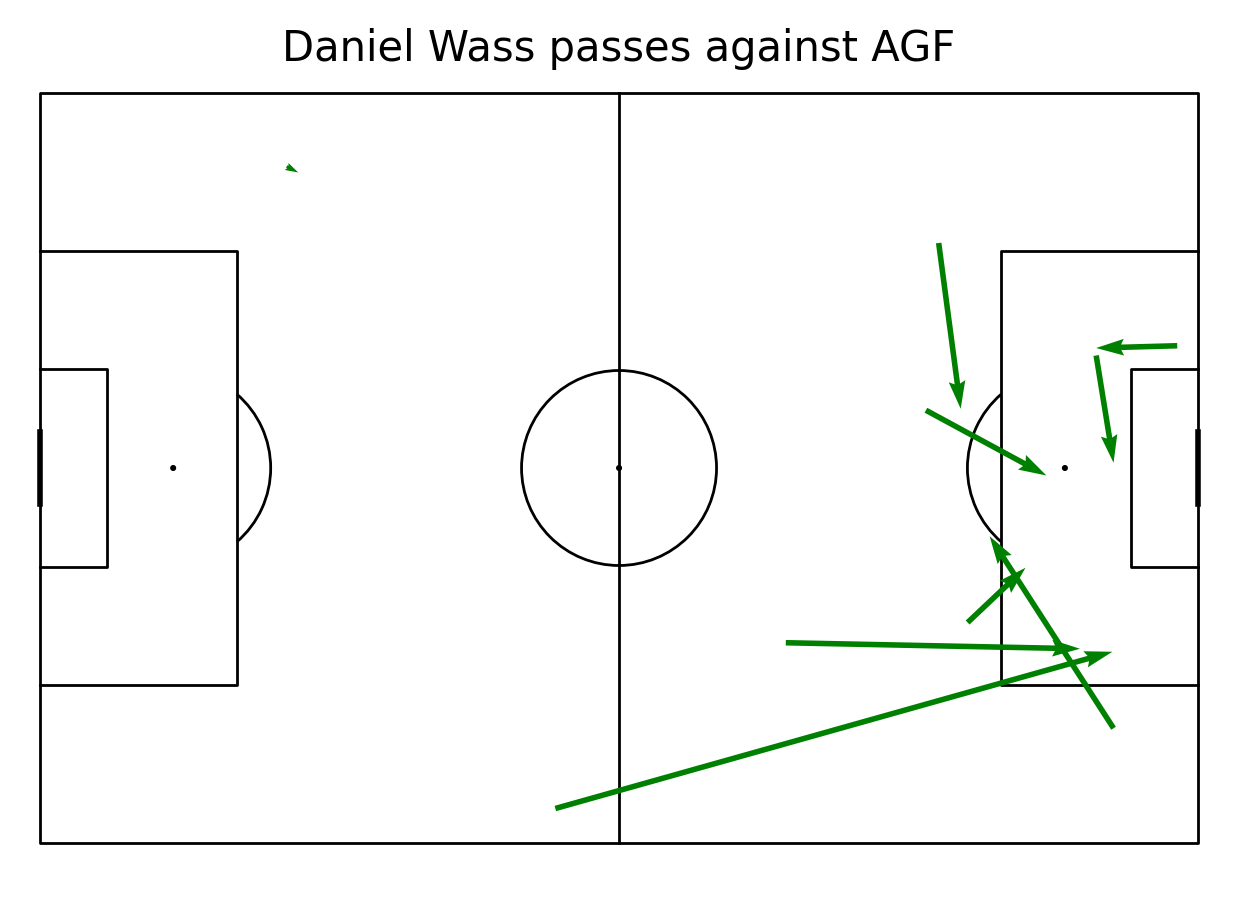

In [ ]:
mask_bronze = (df.type_name == 'pass') & (df.player_name == "Oliver Olsen")  & (df.result_id == 1)#& (df.game_id == 2367375)
mask_failed = (df.type_name == 'pass') & (df.player_name == "Oliver Olsen")  & (df.result_id == 0) #& (df.game_id == 2367375)

df_pass = df.loc[mask_bronze, ['start_x', 'start_y', 'end_x', 'end_y']]
df_failed = df.loc[mask_failed, ['start_x', 'start_y', 'end_x', 'end_y']]

pitch = Pitch(pitch_type = 'opta', line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.start_x, df_pass.start_y,
            df_pass.end_x, df_pass.end_y, color = "green", ax=ax['pitch'])
pitch.arrows(df_failed.start_x, df_failed.start_y,
            df_failed.end_x, df_failed.end_y, color = "red", ax=ax['pitch'])
fig.suptitle("Daniel Wass passes against AGF", fontsize = 30)
plt.show()


In [ ]:
df.head()

,Unnamed: 0,original_event_id,team_id_x,period_id_x,matched_frames,scores,game_id,period_id_y,time_seconds,team_id_y,player_id,start_x,end_x,start_y,end_y,type_id,result_id,bodypart_id,pass_angle,pass_length,action_id,type_name,result_name,bodypart_name,team_name,player_name,is_starter,minutes_played,jersey_number,starting_position,event_id,timestamp_x,period_id,timestamp_y,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,244449_x,244449_y,244449_teamid,244449_s,493824_x,493824_y,493824_teamid,493824_s,200069_x,200069_y,200069_teamid,200069_s,221234_x,221234_y,221234_teamid,221234_s,453905_x,453905_y,453905_teamid,453905_s,478724_x,478724_y,478724_teamid,478724_s,223813_x,223813_y,223813_teamid,223813_s,85050_x,85050_y,85050_teamid,85050_s,204643_x,204643_y,204643_teamid,204643_s,144301_x,144301_y,144301_teamid,144301_s,220037_x,220037_y,220037_teamid,220037_s,241952_x,241952_y,241952_teamid,241952_s,208766_x,208766_y,208766_teamid,208766_s,205454_x,205454_y,205454_teamid,205454_s,492654_x,492654_y,492654_teamid,492654_s,486871_x,486871_y,486871_teamid,486871_s,192647_x,192647_y,192647_teamid,192647_s,56624_x,56624_y,56624_teamid,56624_s,430789_x,430789_y,430789_teamid,430789_s,167145_x,167145_y,167145_teamid,167145_s,91082_x,91082_y,91082_teamid,91082_s,486870_x,486870_y,486870_teamid,486870_s,112340_x,112340_y,112340_teamid,112340_s,51705_x,51705_y,51705_teamid,51705_s,422348_x,422348_y,422348_teamid,422348_s,485358_x,485358_y,485358_teamid,485358_s,538451_x,538451_y,538451_teamid,538451_s,445904_x,445904_y,445904_teamid,445904_s,490907_x,490907_y,490907_teamid,490907_s,108024_x,108024_y,108024_teamid,108024_s,586123_x,586123_y,586123_teamid,586123_s,Id,76001_x,76001_y,76001_teamid,76001_s,232904_x,232904_y,232904_teamid,232904_s,96787_x,96787_y,96787_teamid,96787_s,561098_x,561098_y,561098_teamid,561098_s,555929_x,555929_y,555929_teamid,555929_s,164266_x,164266_y,164266_teamid,164266_s,197498_x,197498_y,197498_teamid,197498_s,166965_x,166965_y,166965_teamid,166965_s,111756_x,111756_y,111756_teamid,111756_s,171332_x,171332_y,171332_teamid,171332_s,193228_x,193228_y,193228_teamid,193228_s,546545_x,546545_y,546545_teamid,546545_s,204591_x,204591_y,204591_teamid,204591_s,98079_x,98079_y,98079_teamid,98079_s,192774_x,192774_y,192774_teamid,192774_s,507438_x,507438_y,507438_teamid,507438_s,428573_x,428573_y,428573_teamid,428573_s,492656_x,492656_y,492656_teamid,492656_s,235120_x,235120_y,235120_teamid,235120_s,247161_x,247161_y,247161_teamid,247161_s,484403_x,484403_y,484403_teamid,484403_s,57513_x,57513_y,57513_teamid,57513_s,213551_x,213551_y,213551_teamid,213551_s,116696_x,116696_y,116696_teamid,116696_s,420965_x,420965_y,420965_teamid,420965_s,478686_x,478686_y,478686_teamid,478686_s,477672_x,477672_y,477672_teamid,477672_s,494784_x,494784_y,494784_teamid,494784_s,83473_x,83473_y,83473_teamid,83473_s,492474_x,492474_y,492474_teamid,492474_s,477641_x,477641_y,477641_teamid,477641_s,230921_x,230921_y,230921_teamid,230921_s,513425_x,513425_y,513425_teamid,513425_s,249864_x,249864_y,249864_teamid,249864_s,612855_x,612855_y,612855_teamid,612855_s,120736_x,120736_y,120736_teamid,120736_s,57059_x,57059_y,57059_teamid,57059_s,504586_x,504586_y,504586_teamid,504586_s,449904_x,449904_y,449904_teamid,449904_s,521052_x,521052_y,521052_teamid,521052_s,192100_x,192100_y,192100_teamid,192100_s,449952_x,449952_y,449952_teamid,449952_s,161376_x,161376_y,161376_teamid,161376_s,534223_x,534223_y,534223_teamid,534223_s,477075_x,477075_y,477075_teamid,477075_s,564992_x,564992_y,564992_teamid,564992_s,590163_x,590163_y,590163_teamid,590163_s,486708_x,486708_y,486708_teamid,486708_s,544908_x,544908_y,544908_teamid,544908_s,539274_x,539274_y,539274_teamid,539274_s,449894_x,449894_y,449894_teamid,449894_s,592867_x,592867_y,592867_teamid,592867_s,212394_x,212394_y,212394_teamid,212394_s,102017_x,102017_y,102017_teamid,102017_s,624707_x,624707_y,624707_teamid,624707_s,486789_x,486789_y,486789_teamid,486789_s,39664_x,39664_y,39664

In [ ]:
pos_counts = df["type_name"].value_counts()
print(pos_counts)

type_name
pass     144051
cross      2860
Name: count, dtype: int64


In [ ]:
pos_counts = df.groupby("starting_position")["type_name"].value_counts()
print(pos_counts)

starting_position  type_name
Defender           pass         60693
                   cross          884
Goalkeeper         pass          9724
Midfielder         pass         47021
                   cross         1107
Striker            pass         13895
                   cross          474
Substitute         pass         12718
                   cross          395
Name: count, dtype: int64


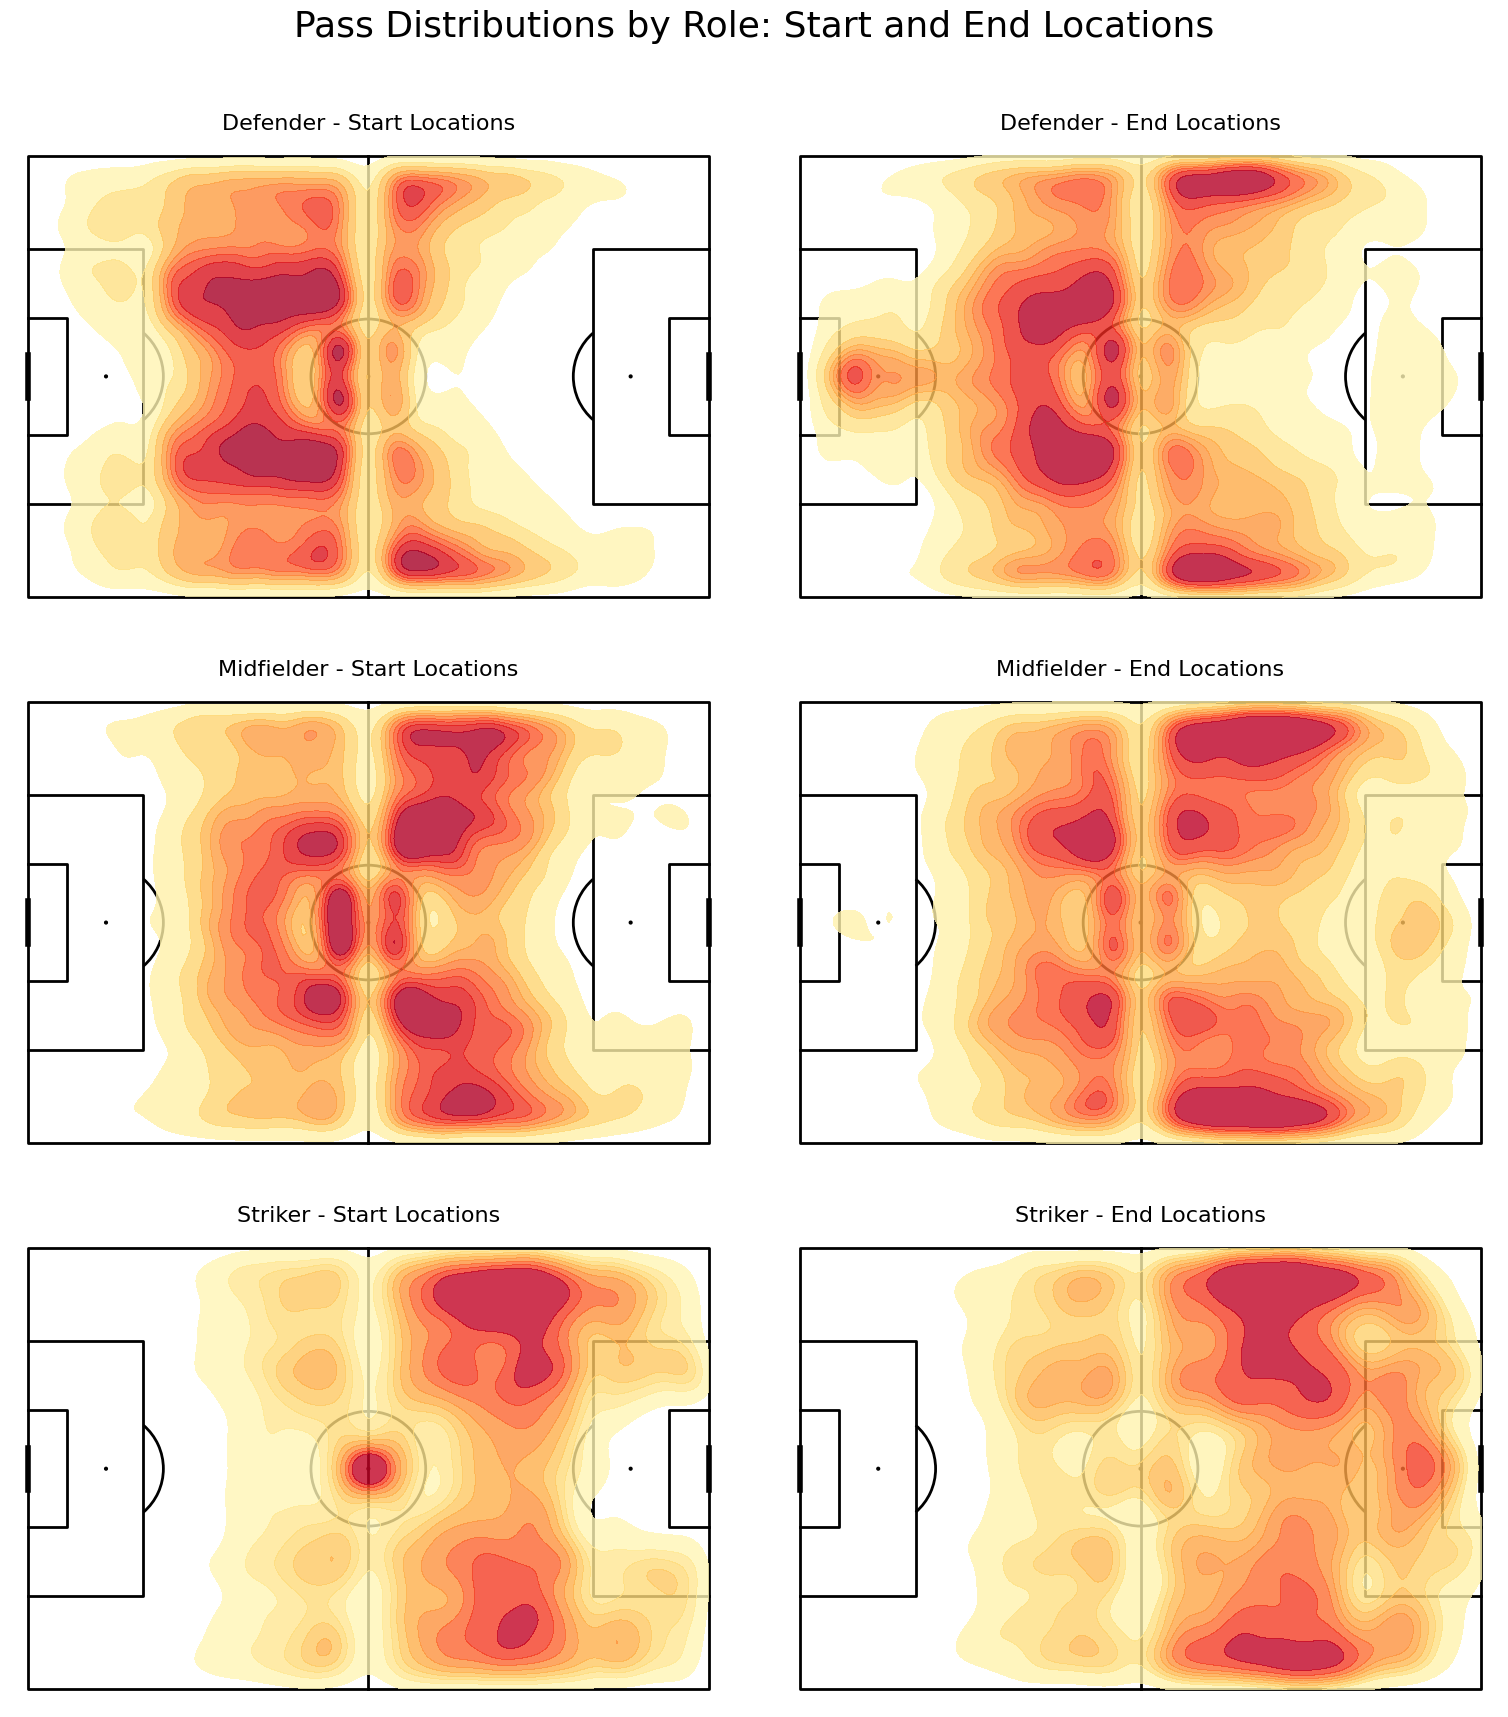

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Define player roles
positions = ['Defender', 'Midfielder', 'Striker']

# Set up 3 rows (positions) x 2 columns (start and end) subplots
pitch = Pitch(
    pitch_type='opta',
    pitch_color='white',
    line_color='black',
    stripe=False
)

fig, axs = pitch.draw(nrows=3, ncols=2, figsize=(16, 18))
fig.suptitle("Pass Distributions by Role: Start and End Locations", fontsize=26)

# Iterate through each role
for i, role in enumerate(positions):
    mask = (df["starting_position"] == role)
    df_role = df.loc[mask, ['start_x', 'start_y', 'end_x', 'end_y']]

    # Start location heatmap
    pitch.kdeplot(
        x=df_role.start_x,
        y=df_role.start_y,
        ax=axs[i][0],
        cmap='YlOrRd',
        fill=True,
        alpha=0.8,
        bw_adjust=0.6,
        thresh=0.05,
        cut=0
    )
    axs[i][0].set_title(f"{role} - Start Locations", fontsize=16)

    # End location heatmap
    pitch.kdeplot(
        x=df_role.end_x,
        y=df_role.end_y,
        ax=axs[i][1],
        cmap='YlOrRd',
        fill=True,
        alpha=0.8,
        bw_adjust=0.6,
        thresh=0.05,
        cut=0
    )
    axs[i][1].set_title(f"{role} - End Locations", fontsize=16)

plt.tight_layout(pad=4)
plt.show()


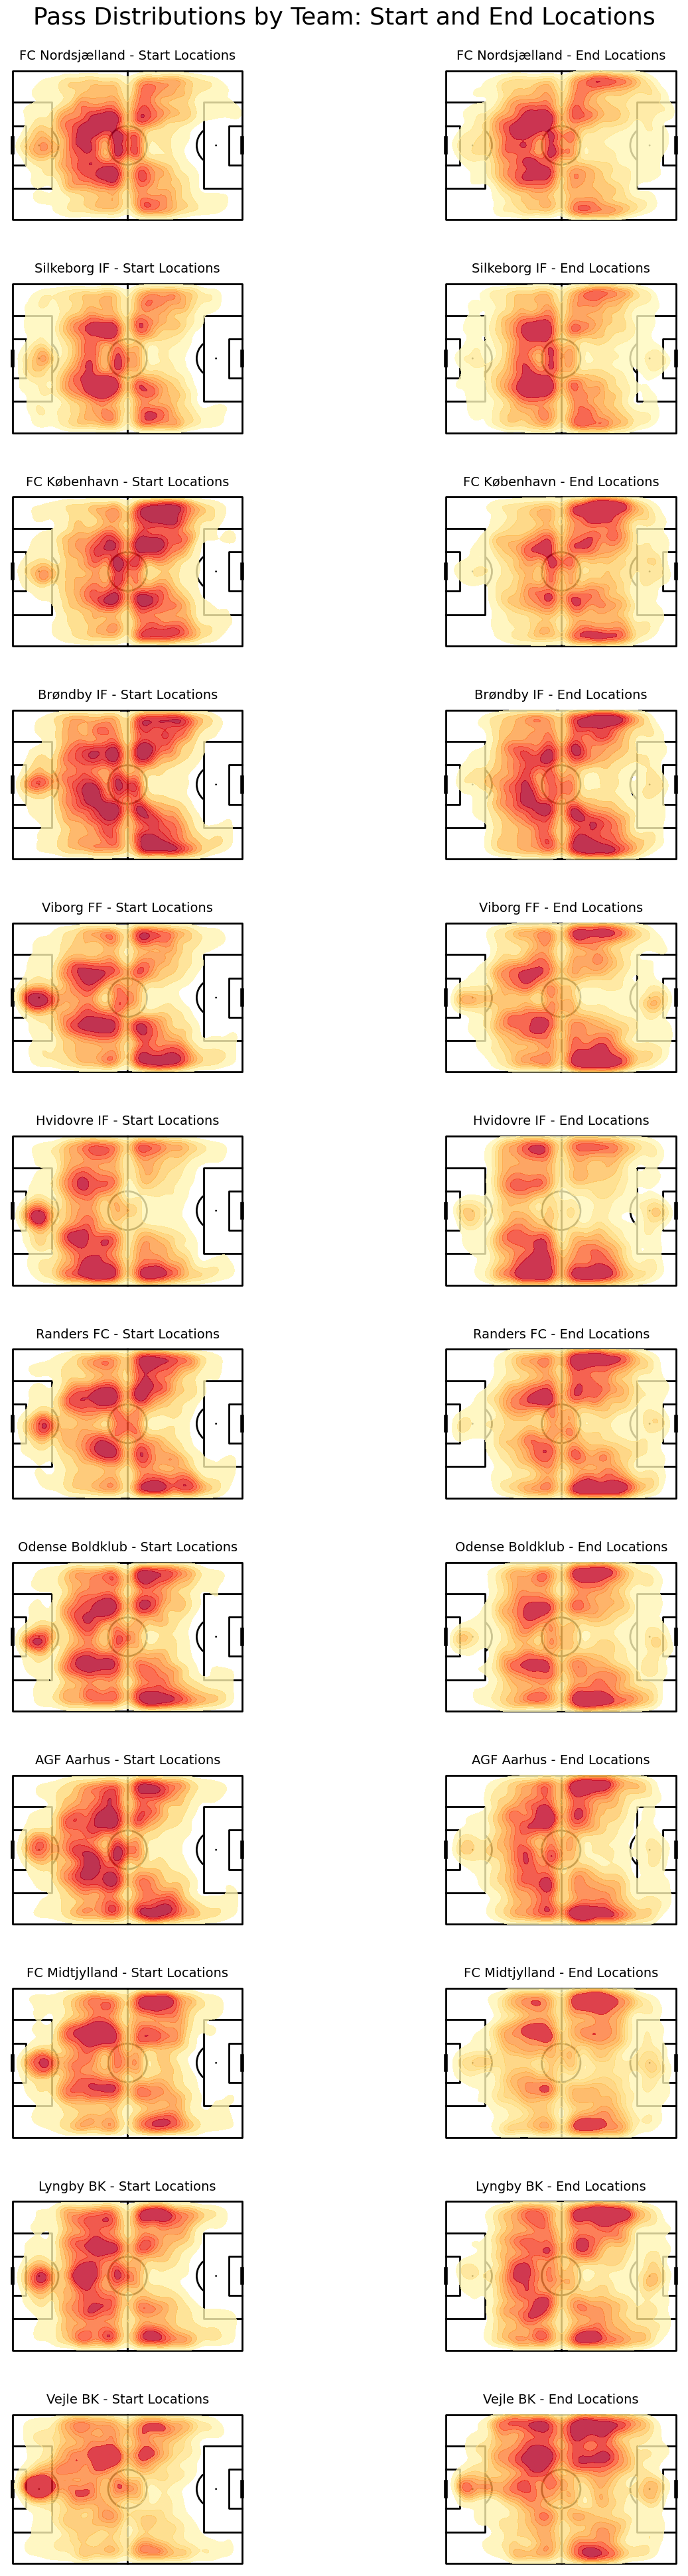

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# List of teams (in desired order)
teams = [
    "FC Nordsjælland", "Silkeborg IF", "FC København", "Brøndby IF", "Viborg FF",
    "Hvidovre IF", "Randers FC", "Odense Boldklub", "AGF Aarhus", "FC Midtjylland",
    "Lyngby BK", "Vejle BK"
]

# Set up pitch
pitch = Pitch(
    pitch_type='opta',
    pitch_color='white',
    line_color='black',
    stripe=False
)

# Create subplots: 12 teams × 2 (start and end)
fig, axs = pitch.draw(nrows=len(teams), ncols=2, figsize=(16, 40))
fig.suptitle("Pass Distributions by Team: Start and End Locations", fontsize=26)

# Loop over each team
for i, team in enumerate(teams):
    mask = (df["team_name"] == team)
    df_team = df.loc[mask, ['start_x', 'start_y', 'end_x', 'end_y']]

    # Start location heatmap
    pitch.kdeplot(
        x=df_team.start_x,
        y=df_team.start_y,
        ax=axs[i][0],
        cmap='YlOrRd',
        fill=True,
        alpha=0.8,
        bw_adjust=0.6,
        thresh=0.05,
        cut=0
    )
    axs[i][0].set_title(f"{team} - Start Locations", fontsize=14)

    # End location heatmap
    pitch.kdeplot(
        x=df_team.end_x,
        y=df_team.end_y,
        ax=axs[i][1],
        cmap='YlOrRd',
        fill=True,
        alpha=0.8,
        bw_adjust=0.6,
        thresh=0.05,
        cut=0
    )
    axs[i][1].set_title(f"{team} - End Locations", fontsize=14)

plt.tight_layout(pad=4)
plt.show()


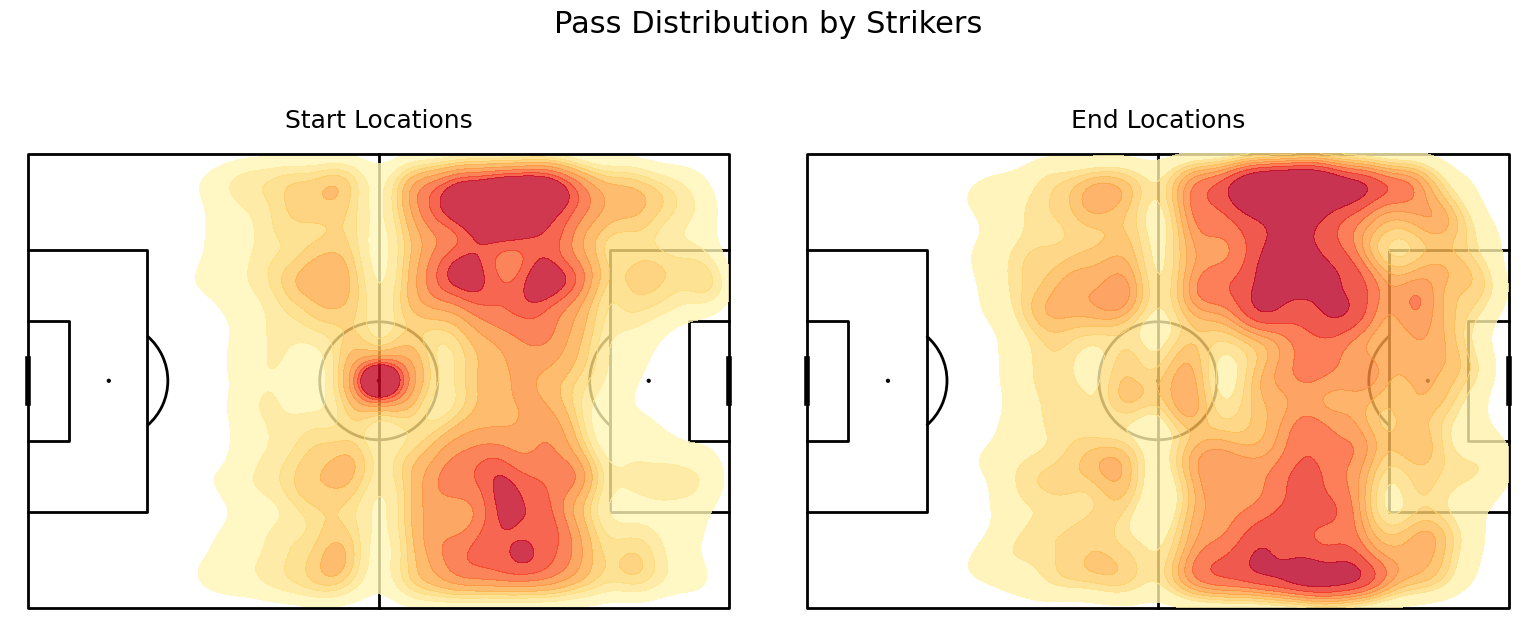

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Filter defender passes
mask_actions = (df.starting_position == "Striker") & (df.type_name == 'pass')
df_pass = df.loc[mask_actions, ['start_x', 'start_y', 'end_x', 'end_y']]

# Set up side-by-side pitches
pitch = Pitch(
    pitch_type='opta',
    pitch_color='white',
    line_color='black',
    stripe=False
)

fig, axs = pitch.draw(nrows=1, ncols=2, figsize=(16, 7))  # side-by-side plots

# Start location heatmap
pitch.kdeplot(
    x=df_pass.start_x,
    y=df_pass.start_y,
    ax=axs[0],
    cmap='YlOrRd',
    fill=True,
    alpha=0.8,
    bw_adjust=0.6,
    thresh=0.05,
    cut=0
)
axs[0].set_title("Start Locations", fontsize=18)

# End location heatmap
pitch.kdeplot(
    x=df_pass.end_x,
    y=df_pass.end_y,
    ax=axs[1],
    cmap='YlOrRd',
    fill=True,
    alpha=0.8,
    bw_adjust=0.6,
    thresh=0.05,
    cut=0
)
axs[1].set_title("End Locations", fontsize=18)

# Main title
fig.suptitle("Pass Distribution by Strikers", fontsize=22)

plt.tight_layout(pad=3)
plt.show()


In [ ]:
team_counts = df['team_name'].value_counts()
print("\nBreakdown by team_name:\n", team_counts)


Breakdown by team_name:
 team_name
FC Nordsjælland    16425
Silkeborg IF       16007
FC København       14815
Brøndby IF         14357
Viborg FF          11471
Odense Boldklub    11408
Hvidovre IF        11365
Randers FC         11256
AGF Aarhus         11248
Lyngby BK          10101
FC Midtjylland      9987
Vejle BK            8471
Name: count, dtype: int64


In [ ]:
games_per_team = df.groupby('team_name')['game_id'].nunique().reset_index(name='num_games')

print(games_per_team)

          team_name  num_games
0        AGF Aarhus         32
1        Brøndby IF         32
2      FC København         33
3    FC Midtjylland         32
4   FC Nordsjælland         32
5       Hvidovre IF         32
6         Lyngby BK         32
7   Odense Boldklub         31
8        Randers FC         32
9      Silkeborg IF         32
10         Vejle BK         32
11        Viborg FF         32


In [ ]:
pass_success_rate = (df['result_name'] == 'success').mean() * 100
print(f"\nPass success rate: {pass_success_rate:.2f}%")


Pass success rate: 83.67%


In [ ]:
# Calculate success rate by starting position
pass_success_rate = (
    df.groupby('starting_position')['result_name']
    .apply(lambda x: (x == 'success').mean() * 100)
    .reset_index(name='success_rate')
)

# Display the result
print(pass_success_rate)


  starting_position  success_rate
0          Defender     86.503077
1        Goalkeeper     77.961744
2        Midfielder     83.300781
3           Striker     78.731992
4        Substitute     81.354381


In [ ]:
import matplotlib.pyplot as plt


In [ ]:














len(pass_angles)

0

In [ ]:
top_passers = df['player_name'].value_counts().head(10)
print("\nTop 10 players by number of passes:\n", top_passers)


Top 10 players by number of passes:
 player_name
Mark Brink           2724
Adamo Nagalo         2544
Jeppe Tverskov       2256
Kevin Diks           2218
Kian Hansen          2204
Jacob Rasmussen      1979
Daniel Wass          1816
Denis Vavro          1667
Frederik Tingager    1602
Wessel Dammers       1590
Name: count, dtype: int64


<ipython-input-43-bf01478fc597>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pass_success = df.groupby('pass_length_bin')['result_id'].agg(['count', 'sum'])


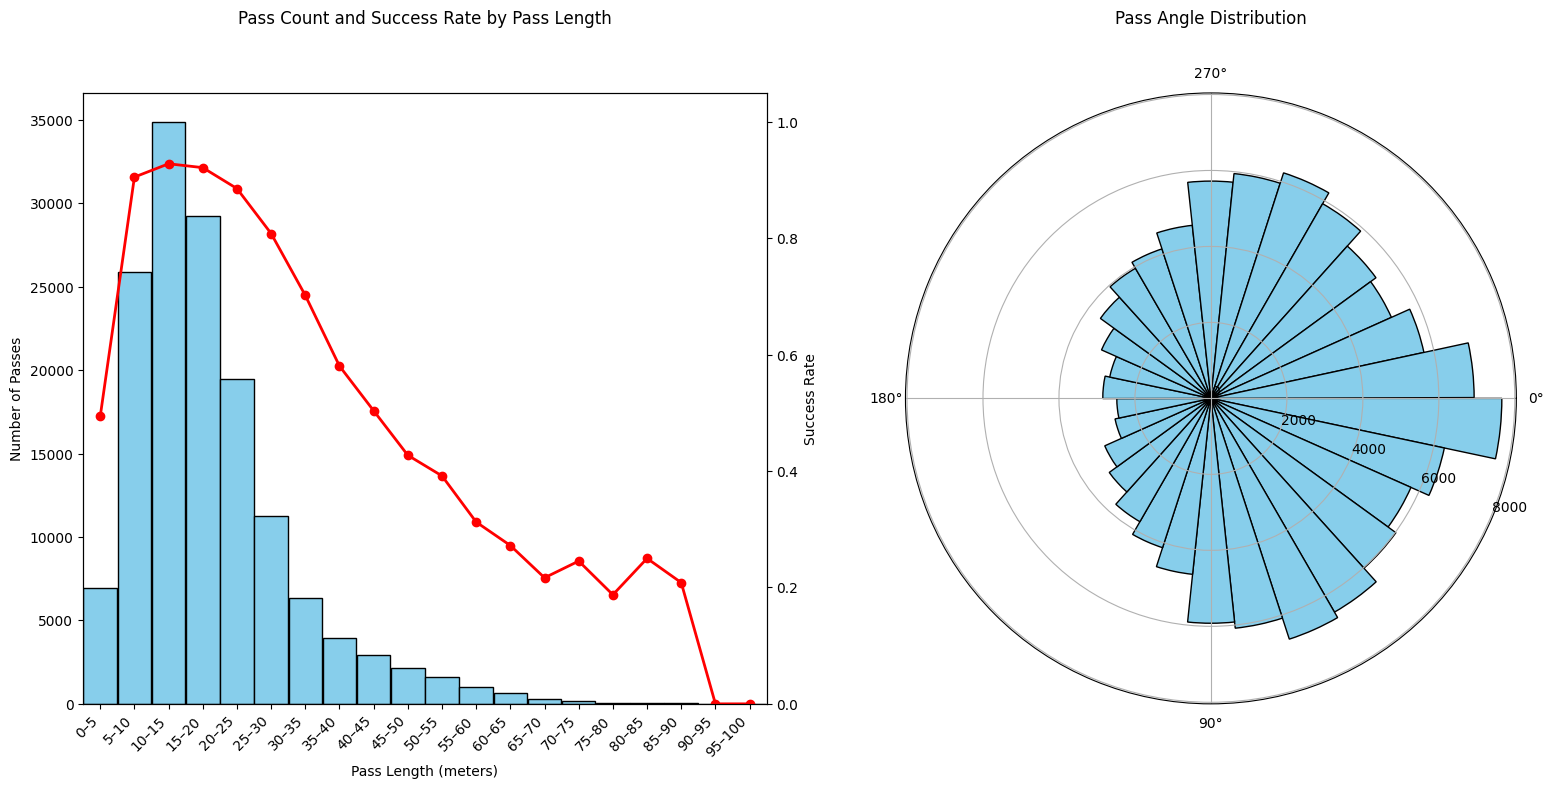

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Setup bins for pass length
bins = np.arange(0, 105, 5)
df['pass_length_bin'] = pd.cut(df['pass_length'], bins=bins, right=False)

# Compute counts and success rates
pass_success = df.groupby('pass_length_bin')['result_id'].agg(['count', 'sum'])
pass_success['success_rate'] = pass_success['sum'] / pass_success['count']
pass_success = pass_success.fillna(0)

x_labels = [f'{int(interval.left)}–{int(interval.right)}' for interval in pass_success.index]
x_pos = [interval.mid for interval in pass_success.index]

# Create the figure and gridspec layout
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# --- Subplot 1: Bar + Line Plot ---
ax1 = fig.add_subplot(gs[0])

bar_width = 4.9
ax1.bar(x_pos, pass_success['count'], width=bar_width, color='skyblue', edgecolor='black', align='center')
ax1.set_xticks(x_pos)
ax1.set_xlim(0, 100)
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax1.set_xlabel('Pass Length (meters)')
ax1.set_ylabel('Number of Passes', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(False)

# Secondary axis for success rate
ax2 = ax1.twinx()
ax2.plot(x_pos, pass_success['success_rate'], color='red', linewidth=2, marker='o', label='Success Rate')
ax2.set_ylabel('Success Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 1.05)

ax1.set_title('Pass Count and Success Rate by Pass Length', y=1.1)

# --- Subplot 2: Polar Histogram ---
ax3 = fig.add_subplot(gs[1], polar=True)

pass_angles = df['pass_angle'].dropna()
ax3.hist(pass_angles, bins=30, color='skyblue', edgecolor='black')

ax3.set_theta_direction(-1)  # Clockwise
ax3.set_yticks([0, 2000, 4000, 6000, 8000])
ax3.set_xticks(np.deg2rad([0, 90, 180, 270]))
ax3.set_title('Pass Angle Distribution', y=1.1)

# Final layout tweaks
plt.tight_layout()
plt.show()


<ipython-input-11-e8e34dc0b4bc>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  angle_success = df_filtered.groupby('angle_bin')['result_id'].agg(['count', 'sum'])


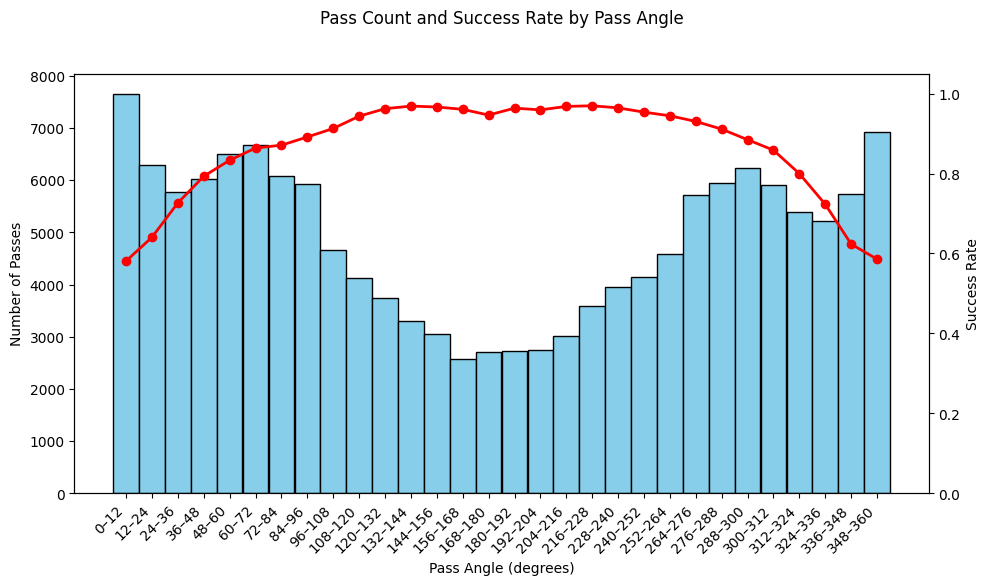

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# --- Setup bins for pass angle (in degrees) ---
angle_bins = np.linspace(0, 360, 31)  # 30 bins of 12 degrees
df['pass_angle_deg'] = np.rad2deg(df['pass_angle'])
df_filtered = df.dropna(subset=['pass_angle_deg', 'result_id'])
df_filtered['angle_bin'] = pd.cut(df_filtered['pass_angle_deg'], bins=angle_bins, right=False)

# Compute counts and success rates
angle_success = df_filtered.groupby('angle_bin')['result_id'].agg(['count', 'sum'])
angle_success['success_rate'] = angle_success['sum'] / angle_success['count']
angle_success = angle_success.fillna(0)

# X-axis setup
x_labels = [f'{int(interval.left)}–{int(interval.right)}' for interval in angle_success.index]
x_pos = [interval.mid for interval in angle_success.index]
bar_width = 11.9  # for spacing (just under 12° bin width)

# --- Create the figure and layout ---
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0])

# Bar plot (pass count)
ax.bar(x_pos, angle_success['count'], width=bar_width, color='skyblue', edgecolor='black', align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel('Pass Angle (degrees)')
ax.set_ylabel('Number of Passes', color='black')
ax.tick_params(axis='y', labelcolor='black')
ax.grid(False)

# Line plot (success rate) on secondary axis
ax2 = ax.twinx()
ax2.plot(x_pos, angle_success['success_rate'], color='red', linewidth=2, marker='o', label='Success Rate')
ax2.set_ylabel('Success Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 1.05)

ax.set_title('Pass Count and Success Rate by Pass Angle', y=1.1)

# --- Final layout tweaks ---
plt.tight_layout()
plt.show()
